In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
apt_filepath = "../python_coursera/train_t.xlsx"

apt_data = pd.read_excel(apt_filepath)

apt_data.head() 

,id,timestamp,площадь,жилая площадь,этаж,макс этажи,из чего изготовлен,год постройки,число комнат,площадь кухни,...,кол-во больничных коек на райоене,кол-во больниц на районе,число университетов в ТОП 20 университетов москвы,кол-во спортивных объектов на районе,кол-во школ допольнительного обучения на районе,"есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы","кол-во культурных объектов, входящих в ТОП 25 объектов Москвы",Кол-во торговых центров на районе,Кол-во офисов на районе,цена_продажа
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,240.0,1,0,7,3,no,0,16,1,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,229.0,1,0,6,1,yes,1,3,0,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,1183.0,1,0,5,1,no,0,0,1,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,17,6,no,0,11,4,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,562.0,4,2,25,2,no,0,10,93,16331452


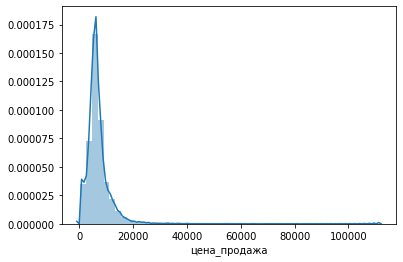

In [3]:
sns.distplot(apt_data['цена_продажа']/1000)

In [4]:
print("Skewness: %f" % apt_data['цена_продажа'].skew()) # сильная положительная ассимметрия 
print("Kurtosis: %f" % apt_data['цена_продажа'].kurt()) # острый пик, т.е. большинство значений лежит в узком диапазоне

Skewness: 4.514246
Kurtosis: 47.259437


In [5]:
apt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24997 entries, 0 to 24996
Data columns (total 34 columns):
id                                                                          24997 non-null int64
timestamp                                                                   24997 non-null datetime64[ns]
площадь                                                                     24997 non-null int64
жилая площадь                                                               19873 non-null float64
этаж                                                                        24830 non-null float64
макс этажи                                                                  15425 non-null float64
из чего изготовлен                                                          15425 non-null float64
год постройки                                                               12530 non-null float64
число комнат                                                                15425 non-null float

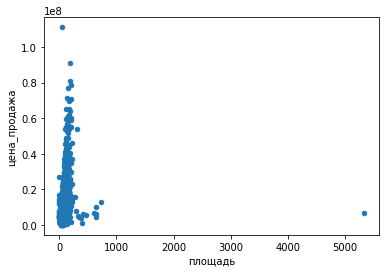

In [6]:
var = 'площадь'
data = pd.concat([apt_data['цена_продажа'], apt_data[var]], axis=1)
data.plot.scatter(x=var, y='цена_продажа')

Очевидно, есть outlier, сразу удалим его. 

In [7]:
apt_data = apt_data[apt_data['площадь'] != apt_data['площадь'].max(axis=0)]

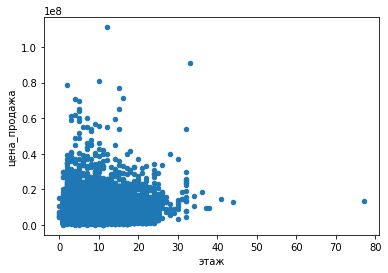

In [8]:
var = 'этаж'
data = pd.concat([apt_data['цена_продажа'], apt_data[var]], axis=1)
data.plot.scatter(x=var, y='цена_продажа');

Аналогично, есть outlier.

In [9]:
apt_data = apt_data[apt_data['этаж'] != apt_data['этаж'].max(axis=0)]

(0, 20000000)

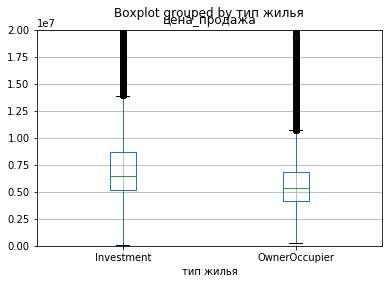

In [10]:
ax = apt_data.boxplot('цена_продажа', by='тип жилья')
ax.set_ylim([0, 20000000]) 

Заметим, что что средняя цена жилья типа "investment" дороже, чем "onweroccupier"

In [11]:
most_expensive = apt_data[{'район', 'цена_продажа'}].nlargest(20 ,'цена_продажа')
most_expensive.groupby('район')['цена_продажа'].count().sort_values(ascending=False)

район
Hamovniki                4
Ramenki                  3
Taganskoe                2
Tverskoe                 1
Teplyj Stan              1
Prospekt Vernadskogo     1
Presnenskoe              1
Pokrovskoe Streshnevo    1
Obruchevskoe             1
Mar'ina Roshha           1
Lomonosovskoe            1
Horoshevskoe             1
Donskoe                  1
Arbat                    1
Name: цена_продажа, dtype: int64

Самая дорогая недвижимость – в районе Хамовники, Раменки и на Таганке. 

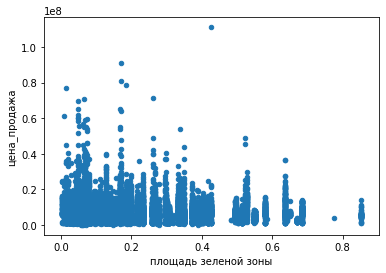

In [12]:
var = 'площадь зеленой зоны'
data = pd.concat([apt_data['цена_продажа'], apt_data[var]], axis=1)
data.plot.scatter(x=var, y='цена_продажа')

Видим, что цена недвижимости, где площадь зеленой зоны составляет 0-0.2, выше, чем там, где эта площадь больше. 
Как правило, чем ближе к центру, тем выше цена, а в центре города зеленых зон обычно меньше.  

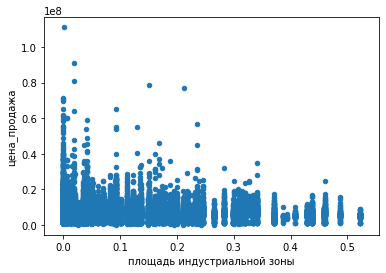

In [13]:
var = 'площадь индустриальной зоны'
data = pd.concat([apt_data['цена_продажа'], apt_data[var]], axis=1)
data.plot.scatter(x=var, y='цена_продажа') 

Похожая картина с индустриальными зонами. 

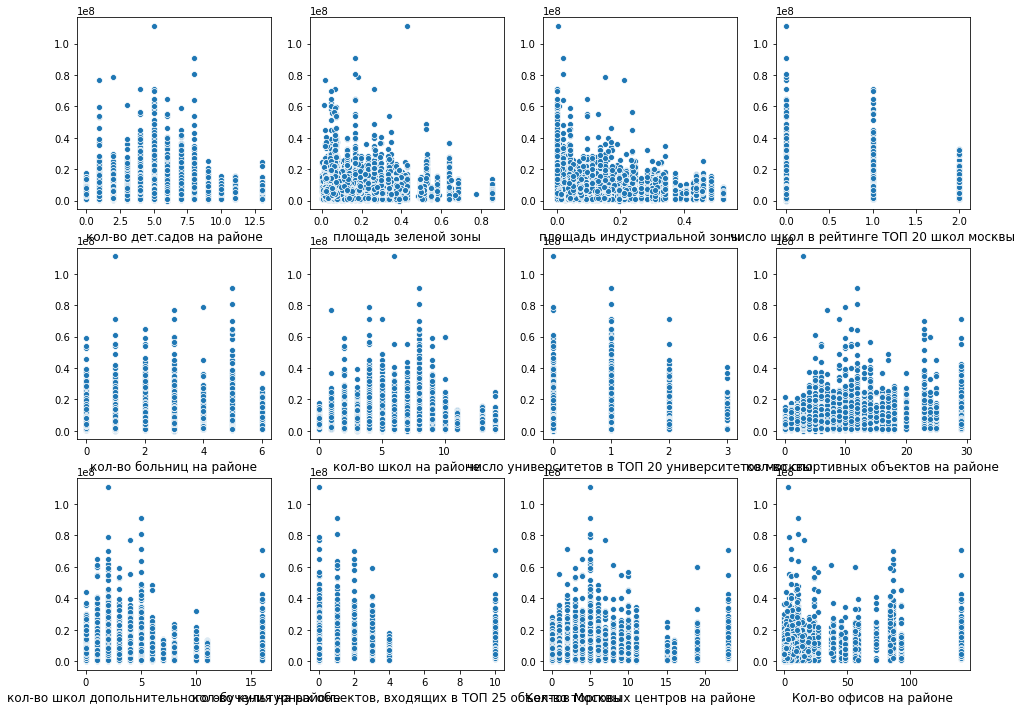

In [15]:
nvars = ['кол-во дет.садов на районе','площадь зеленой зоны','площадь индустриальной зоны','число школ в рейтинге ТОП 20 школ москвы',
         'кол-во больниц на районе','кол-во школ на районе', 'число университетов в ТОП 20 университетов москвы', 'кол-во спортивных объектов на районе',
         'кол-во школ допольнительного обучения на районе', 'кол-во культурных объектов, входящих в ТОП 25 объектов Москвы', 'Кол-во торговых центров на районе', 'Кол-во офисов на районе']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for i,feat in enumerate(nvars):
    ax = axes[int(i / 4), i % 4]
    sns.scatterplot(x=feat, y='цена_продажа', data=apt_data, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(feat, fontsize=12)

(0, 20000000)

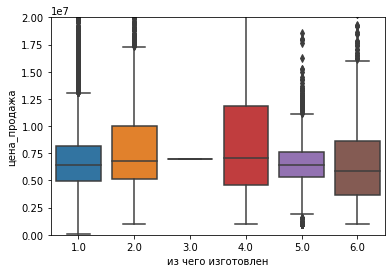

In [14]:
apt_data['из чего изготовлен'].unique()
sns.boxplot(x='из чего изготовлен', y='цена_продажа', data=apt_data)
plt.ylim(0,20000000)

Можем сделать вывод, что различие в цене недвижимости в зависимсти от материала дома не является статистически значимым.

(0, 20000000)

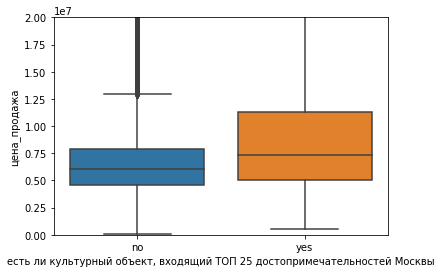

In [15]:
sns.boxplot(x='есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы', y = 'цена_продажа', data=apt_data)
plt.ylim(0,20000000)

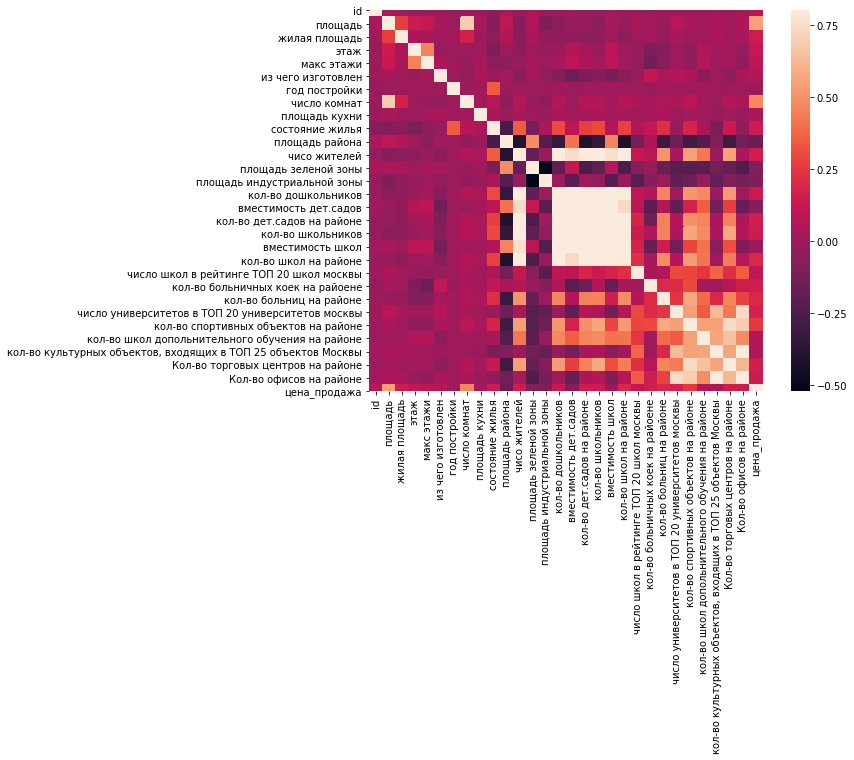

In [16]:
df_train = apt_data.drop('timestamp', axis = 1)
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, vmax=.8, square=True);

In [17]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
состояние жилья,12794,0.511862
год постройки,12466,0.498740
кол-во больничных коек на райоене,11704,0.468254
макс этажи,9571,0.382917
из чего изготовлен,9571,0.382917
число комнат,9571,0.382917
площадь кухни,9571,0.382917
вместимость дет.садов,5162,0.206521
вместимость школ,5160,0.206441
жилая площадь,5124,0.205001


Удалим из датасета переменные, которые содержат более 20% пропусков. Мы это можем сделать более или менее безболезненно,
так как эти переменные коррелируют с другими, которые содержат меньше пропусков. Например, "число комнат", "жилая площадь" 
и "площадь кухни" коррелируют с "площадью", что привело бы к проблеме мультиколлинеарности при построении модели, поэтому будет вполне 
достаточно, если мы учтем только "площадь". Аналогично, избавляемся от переменных "кол-во больничных коек на райоене", "вместимость дет.садов", 
"вместимость школ", так как они коррелируют с числом жителей в районе. "Состояние жилья" и "год постройки"

In [18]:
df_train['состояние жилья'].unique()

array([nan,  3.,  1.,  2.,  4., 33.])

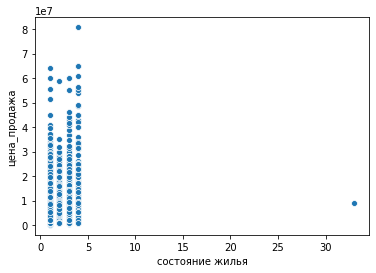

In [19]:
sns.scatterplot(x = 'состояние жилья',y='цена_продажа', data = apt_data)

Состояние жилья на первый взгляд важная переменная, однако она содержит слишком много пропусков. К тому же, не понятно,
что значат уровни 1,2,3,4,33 - нет очевидной зависимости между состоянияем жилья и ценой. 

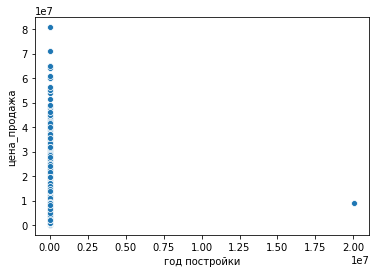

In [20]:
sns.scatterplot(x = 'год постройки',y='цена_продажа', data = apt_data)
#apt_data['год постройки'].hist()

Год постройки не сильно различается, он почти не влияет на цену и содержит много пропусков, поэтому отбрасываем эту переменную. 

In [21]:
df_train = df_train.drop((missing_data[missing_data['Percent'] > 0.2]).index,1)

In [22]:
df_train.columns

Index(['id', 'площадь', 'этаж', 'тип жилья', 'район', 'площадь района',
       'чисо жителей', 'площадь зеленой зоны', 'площадь индустриальной зоны',
       'кол-во дошкольников', 'кол-во дет.садов на районе',
       'кол-во школьников', 'кол-во школ на районе',
       'число школ в рейтинге ТОП 20 школ москвы', 'кол-во больниц на районе',
       'число университетов в ТОП 20 университетов москвы',
       'кол-во спортивных объектов на районе',
       'кол-во школ допольнительного обучения на районе',
       'есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы',
       'кол-во культурных объектов, входящих в ТОП 25 объектов Москвы',
       'Кол-во торговых центров на районе', 'Кол-во офисов на районе',
       'цена_продажа'],
      dtype='object')

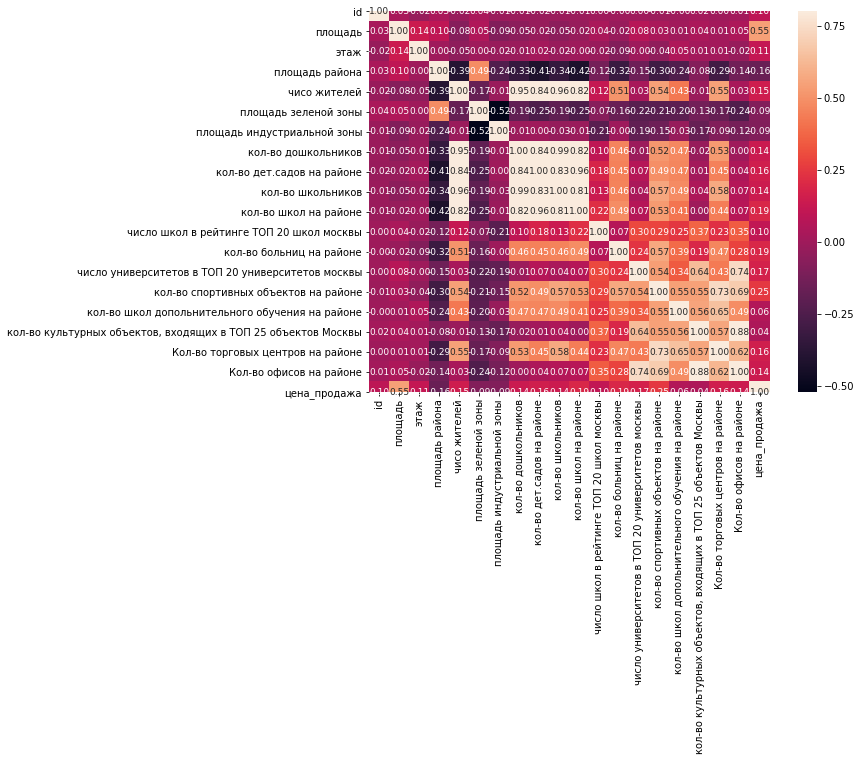

In [23]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', annot_kws={'size': 9})

Выберем переменные, которые больше всего влияют на цену и не сильно коррелируют между собой. 

In [24]:
cols = ['тип жилья', 'район','площадь','чисо жителей','этаж', 'число университетов в ТОП 20 университетов москвы', 
        'кол-во школ допольнительного обучения на районе',
        'есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы',
        'кол-во спортивных объектов на районе', 'кол-во больниц на районе', 'Кол-во торговых центров на районе',
        'цена_продажа']

In [25]:
df_train[cols].isnull().sum().sort_values(ascending=False)

этаж                                                                        167
цена_продажа                                                                  0
Кол-во торговых центров на районе                                             0
кол-во больниц на районе                                                      0
кол-во спортивных объектов на районе                                          0
есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы      0
кол-во школ допольнительного обучения на районе                               0
число университетов в ТОП 20 университетов москвы                             0
чисо жителей                                                                  0
площадь                                                                       0
район                                                                         0
тип жилья                                                                     0
dtype: int64

In [83]:
df_good_vars = df_train[cols]
df_good_vars = df_good_vars.drop(df_good_vars.loc[df_good_vars['этаж'].isnull()].index)

In [84]:
df_good_vars.shape

(24828, 12)

In [85]:
df_good_vars.isnull().sum()

тип жилья                                                                   0
район                                                                       0
площадь                                                                     0
чисо жителей                                                                0
этаж                                                                        0
число университетов в ТОП 20 университетов москвы                           0
кол-во школ допольнительного обучения на районе                             0
есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы    0
кол-во спортивных объектов на районе                                        0
кол-во больниц на районе                                                    0
Кол-во торговых центров на районе                                           0
цена_продажа                                                                0
dtype: int64

Удалим выбросы из датасета

In [87]:
Q1 = df_good_vars.quantile(0.25)
Q3 = df_good_vars.quantile(0.75)
IQR = Q3 - Q1

df_clean = df_good_vars[~((df_good_vars < (Q1 - 1.5 * IQR)) |(df_good_vars > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.shape

(19800, 12)

Рассмотрим распределение цены. 

AttributeError: 'DataFrame' object has no attribute 'probplot'

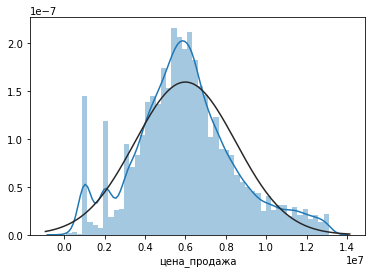

<Figure size 432x288 with 0 Axes>

In [91]:
sns.distplot(df_clean['цена_продажа'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_clean['цена_продажа'], plot=plt)

Рассомтрим ассиметрию и стандартное отклонение переменнных. 

In [ ]:
statis = pd.DataFrame((df_clean.skew().sort_values(ascending=False)), columns = ['skew'])
statis['Std'] = df_clean.std()
statis[statis['skew'] > 1]

In [93]:
statis = pd.DataFrame((df_clean.std().sort_values(ascending=False)), columns = ['std'])
statis[statis['std'] > 30]

,std
цена_продажа,2.504024e+06
чисо жителей,5.547932e+04


Стандартизируем переменную "число жителей". 

In [98]:
df_clean[['чисо жителей']] = StandardScaler().fit_transform(df_clean[['чисо жителей']])
df_clean

,тип жилья,район,площадь,чисо жителей,этаж,число университетов в ТОП 20 университетов москвы,кол-во школ допольнительного обучения на районе,"есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы",кол-во спортивных объектов на районе,кол-во больниц на районе,Кол-во торговых центров на районе,цена_продажа
1,Investment,Nagatinskij Zaton,34,0.662541,3.0,0,1,yes,6,1,3,6000000
2,Investment,Tekstil'shhiki,43,0.416605,2.0,0,1,no,5,1,0,5700000
3,Investment,Mitino,89,1.800309,9.0,0,6,no,17,1,11,13100000
5,Investment,Nizhegorodskoe,67,-0.627288,14.0,0,0,no,7,0,6,9100000
6,Investment,Sokol'niki,25,-0.381965,10.0,0,6,no,17,3,6,5500000
...,...,...,...,...,...,...,...,...,...,...,...,...
24992,Investment,Golovinskoe,37,0.401067,16.0,0,2,no,3,2,5,6600000
24993,OwnerOccupier,Poselenie Moskovskij,72,-1.023409,2.0,0,3,no,3,0,2,8590436
24994,OwnerOccupier,Poselenie Desjonovskoe,40,-1.166331,1.0,0,1,no,0,0,0,4295979
24995,Investment,Zapadnoe Degunino,51,0.003864,8.0,0,2,no,3,0,5,8100000


In [164]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(['цена_продажа'], axis=1)
y = df_clean['цена_продажа']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

s = (df_clean.dtypes == 'object')
object_cols = list(s[s].index)

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_df_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_df_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [145]:
import xgboost as xgb 
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [146]:
XGBoost = XGBRegressor()

#Parameters for XG Boost
grid_para_xgboost = [{
        'learning_rate': [0.01,0.1,0.2],
        #'min_child_weight': [1,3, 5,7 ,10],
        #'gamma': [0.25,0.5, 1, 1.5, 2, 5],
        #'subsample': [0.4,0.6, 0.8, 1.0],
        #'colsample_bytree': [0.4,0.6, 0.8, 1.0],
        'max_depth': [3,4,5]
        }]

#Once parameters are selected we pass them to the model
grid_search_xgboost = GridSearchCV(XGBoost, grid_para_xgboost, cv=10)

#we fit the model
%time grid_search_xgboost.fit(OH_X_train, y_train)

[19:15:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:16:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:16:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:16:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:16:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:16:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:16:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:17:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:17:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:30:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:30:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'learning_rate': [0.01, 0.1, 0.2],
                          'max_depth': [3, 4, 5]}],
             pre_d

In [161]:
XGBoost.set_params(**grid_search_xgboost.best_params_)

print(grid_search_xgboost.best_params_)

print(grid_search_xgboost.best_score_)

{'learning_rate': 0.1, 'max_depth': 5}
0.9999910742911075


In [162]:
#xgboost = XGBRegressor(learning_rate = 0.1)
xgboost = XGBRegressor()
xgboost_model = xgboost.fit(OH_X_train, y_train)

xgboost_train_pred = xgboost_model.predict(OH_X_train)
xgboost_test_pred = xgboost_model.predict(OH_X_valid)

[19:46:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [163]:
from sklearn.metrics import mean_squared_error

xgboost_train = np.sqrt(mean_squared_error(y_train, xgboost_train_pred))
xgboost_test = np.sqrt(mean_squared_error(y_valid, xgboost_test_pred))

print("RMSE for train data: %.1f" % round(xgboost_train, 1))
print("RMSE for test data: %.1f" % round(xgboost_test, 1))

RMSE for train data: 510.5
RMSE for test data: 529.7


In [170]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, n_jobs=4)
my_model.fit(OH_X_train, y_train, 
             early_stopping_rounds=6, 
             eval_set=[(OH_X_valid, y_valid)], 
             verbose=False)

[19:57:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [171]:
predictions = my_model.predict(OH_X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 3732.7926057449495


In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor() 

grid_para_forest = [{
    'criterion':['mse'],
    'n_estimators': [25, 50, 100,500,1000],
    'min_samples_leaf': range(5, 20),
    #'max_features':['log2','sqrt', 'auto'],
    'min_samples_split': np.linspace(start=2, stop=30, num=15, dtype=int),
    }]

grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=10)

%time grid_search_forest.fit(OH_X_train, y_train)

In [ ]:
# лучшие параметры модели
print(grid_search_forest.best_params_)

print(grid_search_forest.best_score_)

In [ ]:
forest = RandomForestRegressor(n_estimators=500,
                               max_features = 'sqrt',
                                oob_score=True,
                                min_samples_leaf=5, 
                               min_samples_split= 8)

forest_model = forest.fit(OH_X_train, y_train)

rf_y_train_pred = forest_model.predict(OH_X_train)
rf_y_valid_pred = forest_model.predict(OH_X_valid)

#Scores
print(forest_model.score)

In [ ]:
rmse_rf_train = np.sqrt(mean_squared_error(y_train, rf_y_train_pred))
rmse_rf_valid = np.sqrt(mean_squared_error(y_valid, rf_y_valid_pred))

print("RMSE for train data: $%.1f" % round(rmse_rf_train, 1))
print("RMSE for test data: $%.1f" % round(rmse_rf_valid, 1))

In [172]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [173]:
gb = XGBRegressor(n_jobs=4, random_state=0)
ls = Lasso(alpha=1e-6, normalize=True)
el = ElasticNet(alpha=1e-6, normalize=True)
rf = RandomForestRegressor(random_state=0)

base_learners = [
    ('ls', ls), ('el', el), ('rf', rf), ('gb', gb)
]

In [174]:
P = np.zeros((OH_X_valid.shape[0], len(base_learners)))
P = pd.DataFrame(P, columns=[e for e, _ in base_learners])

for est_name, est in base_learners:
    est.fit(OH_X_train, y_train)
    p = est.predict(OH_X_valid)
    P.loc[:, est_name] = p
    print("%3s : %.4f" % (est_name, mean_absolute_error(y_valid, p)))

 ls : 32810.6163
 el : 81844.8400
 rf : 492.3353
[19:59:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 gb : 13837.2723


Загружаем тестовый датасет и прогнозируем цену. 

In [43]:
apt_test_filepath = "../python_coursera/test_t.xlsx"

apt_test_data = pd.read_excel(apt_test_filepath)

intersection_cols = df_good_vars.columns & apt_test_data.columns
apt_test_data = apt_test_data[intersection_cols]

apt_test_data.isnull().sum().sort_values(ascending=False)

Кол-во торговых центров на районе                                           0
кол-во больниц на районе                                                    0
кол-во спортивных объектов на районе                                        0
есть ли культурный объект, входящий ТОП 25 достопримечательностей Москвы    0
кол-во школ допольнительного обучения на районе                             0
число университетов в ТОП 20 университетов москвы                           0
этаж                                                                        0
чисо жителей                                                                0
площадь                                                                     0
район                                                                       0
тип жилья                                                                   0
dtype: int64

In [ ]:
apt_test_data[['чисо жителей']] = StandardScaler().fit_transform(apt_test_data[['чисо жителей']])

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_test = pd.DataFrame(OH_encoder.transform(apt_test_data[object_cols]))
OH_cols_test.index = apt_test_data.index
num_X_test = apt_test_data.drop(object_cols, axis=1)
OH_X_test = pd.concat([num_X_valid, OH_cols_test], axis=1)

Прогнозируем цену. 

In [ ]:
price_pred = my_model.predict(OH_X_test)
#pd.DataFrame(price_pred).to_csv("path/to/file.csv")